In [ ]:
#As always, install the pip packages in your current Jupyter Kernel
#In case you don't have the packages installed, uncoment the following lines and run them :D

#import sys
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install matplotlib
# !{sys.executable} -m pip install sklearn

In [1]:
# Basic import of necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [2]:
# Load the digits dataset
digits = datasets.load_digits()

# Extract the feature matrix (data) and target vector (labels)
X = digits.data
y = digits.target

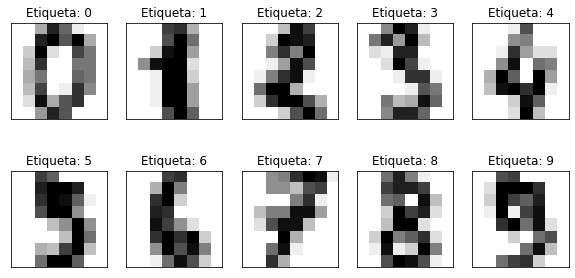

In [3]:
# Visualize a few sample digits
# Create a 2x5 grid of subplots
fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={'xticks':(), 'yticks':()})

# Loop through the subplots and images
for ax, image, label in zip(axes.ravel(), digits.images, digits.target):
    # Display the image on the current subplot
    ax.imshow(image, cmap=plt.cm.gray_r)
    
    # Set the title of the subplot to the label of the image
    ax.set_title('Label: %i' % label)

# Display the entire plot
plt.show()

In [4]:
# Apply PCA for dimensionality reduction
# Create a PCA instance with 2 components
pca = PCA(n_components=2)

# Fit PCA to the feature matrix 'X' and transform it to the reduced space
X_pca = pca.fit_transform(X)

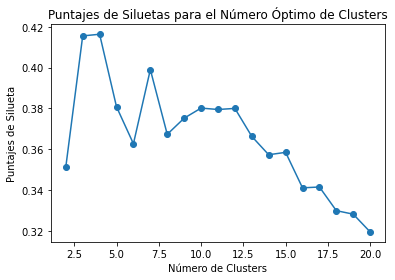

Número Óptimo de Clusters Estimado: 4


In [5]:
# Calculate silhouette scores for different number of clusters
silhouette_scores = []
for n_components in range(2, 21):
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    labels = gmm.fit_predict(X_pca)
    silhouette_scores.append(silhouette_score(X_pca, labels))

# Plot the Silhouette Score graph
plt.plot(range(2, 21), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.show()

# Find the index with the maximum silhouette score
optimal_n_components = np.argmax(silhouette_scores) + 2

# Print the estimated optimal number of clusters
print("Estimated Optimal Number of Clusters:", optimal_n_components)

In [6]:
# Fit GMM model with the optimal number of components
# Set the optimal number of components (clusters) based on your analysis
optimal_n_components = 4

# Create a Gaussian Mixture Model (GMM) instance with the specified number of components
# 'random_state' ensures reproducibility of results
gmm = GaussianMixture(n_components=optimal_n_components, random_state=42)

# Fit the GMM model to the PCA-transformed data 'X_pca'
gmm.fit(X_pca)

GaussianMixture(n_components=4, random_state=42)

In [7]:
# Predict cluster labels using the fitted GMM model
labels = gmm.predict(X_pca)

In [8]:
# Calculate Silhouette Score for the entire dataset
# Calculate the average silhouette score using the PCA-transformed data and cluster labels
silhouette_avg = silhouette_score(X_pca, labels)

# Print the average silhouette score, a measure of the overall cluster quality
print("Average Silhouette Score:", silhouette_avg)

Puntaje de Silueta Promedio: 0.4163304521359074


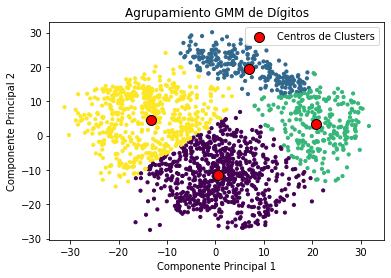

In [9]:
zz
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=10, cmap='viridis')

# Scatter plot of cluster centers (means) in red with black edges
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], marker='o', s=100, color='red', edgecolors='k', label='Cluster Centers')

# Add legend to the plot
plt.legend()

# Set labels for the x and y axes
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Set the title of the plot
plt.title('GMM Clustering of Digits')

# Display the plot
plt.show()